<a href="https://colab.research.google.com/github/rmorlowski/Machine-Learning/blob/master/Bank_Marketing_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Evaluating Classification Methods

MSDS422 SEC55 - Assignment 02
Ryan Orlowski

Jump-Start for the Bank Marketing Study
as described in Marketing Data Science: Modeling Techniques
for Predictive Analytics with R and Python (Miller 2015)

jump-start code revised by Thomas W. Milller (2017/09/26)

Scikit Learn documentation for this assignment:
http://scikit-learn.org/stable/auto_examples/classification/
plot_classifier_comparison.html
http://scikit-learn.org/stable/modules/generated/
sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB.score
http://scikit-learn.org/stable/modules/generated/
sklearn.linear_model.LogisticRegression.html
http://scikit-learn.org/stable/modules/model_evaluation.html 
http://scikit-learn.org/stable/modules/generated/
sklearn.model_selection.KFold.html

prepare for Python version 3x features and functions
comment out for Python 3.x execution
from __future__ import division, print_function
from future_builtins import ascii, filter, hex, map, oct, zip

The purpose of the assignment is to explore bank marketing data from 2008 to 2010 to predict which clients will invest in term deposits. Identification of potential target customers will be accomplished through Naïve Bayes classification and logistic regression. From these techniques, we will identify factors that affect banking client response to guide future marketing campaigns.

#### Section 1: Data Survey

An initial data survey will provide an idea for the type of data we are analyzing.  The first step, is taking a look at the data to get a record count, identify missing values, and potential new variables.

This section shows how to read in data from a comma-delimited text file manipuate data, create new count variables, define categorical variables



In [0]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1


In [0]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
import pandas_profiling
import statsmodels as sm

get_ipython().magic(u'matplotlib inline')

In [0]:
#Set some display options   
pd.set_option('display.notebook_repr_html', False) 
pd.set_option('display.max_columns', 40) 
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 120)

In [0]:
# use the full data set after development is complete with the smaller data set
# bank = pd.read_csv('bank-full.csv', sep = ';')  # start with smaller data set

In [0]:
# Import file to google colaboratory
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [0]:
# read in ";" text file, creating a pandas DataFrame object
import io

#bank = pd.read_csv(io.StringIO(uploaded['bank.csv'].decode('utf-8')))

In [0]:
# initial work with the smaller data set
 bank = pd.read_csv('bank.csv', sep = ';')  # start with smaller data set
# examine the shape of original input data
print(bank.shape)

(4521, 17)


In [0]:
# drop observations with missing data, if any
bank.dropna()

      age            job  marital  education default  balance housing loan   contact  day month  duration  campaign  \
0      30     unemployed  married    primary      no     1787      no   no  cellular   19   oct        79         1   
1      33       services  married  secondary      no     4789     yes  yes  cellular   11   may       220         1   
2      35     management   single   tertiary      no     1350     yes   no  cellular   16   apr       185         1   
3      30     management  married   tertiary      no     1476     yes  yes   unknown    3   jun       199         4   
4      59    blue-collar  married  secondary      no        0     yes   no   unknown    5   may       226         1   
...   ...            ...      ...        ...     ...      ...     ...  ...       ...  ...   ...       ...       ...   
4516   33       services  married  secondary      no     -333     yes   no  cellular   30   jul       329         5   
4517   57  self-employed  married   tertiary    

In [0]:
# examine the structure of the DataFrame object
print('\nContents of initial bank data ---------------')


Contents of initial bank data ---------------


In [0]:
# examine the shape of input data after dropping missing data
print(bank.shape)

(4521, 17)


In [0]:
# look at the list of column names, note that y is the response
list(bank.columns.values)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

In [0]:
# look at the beginning of the DataFrame
bank.head()

   age          job  marital  education default  balance housing loan   contact  day month  duration  campaign  pdays  \
0   30   unemployed  married    primary      no     1787      no   no  cellular   19   oct        79         1     -1   
1   33     services  married  secondary      no     4789     yes  yes  cellular   11   may       220         1    339   
2   35   management   single   tertiary      no     1350     yes   no  cellular   16   apr       185         1    330   
3   30   management  married   tertiary      no     1476     yes  yes   unknown    3   jun       199         4     -1   
4   59  blue-collar  married  secondary      no        0     yes   no   unknown    5   may       226         1     -1   

   previous poutcome response  
0         0  unknown       no  
1         4  failure       no  
2         1  failure       no  
3         0  unknown       no  
4         0  unknown       no  

In [0]:
# mapping function to convert text no/yes to integer 0/1
convert_to_binary = {'no' : 0, 'yes' : 1}

In [0]:
# define binary variable for having credit in default
default = bank['default'].map(convert_to_binary)

In [0]:
# define binary variable for having a mortgage or housing loan
housing = bank['housing'].map(convert_to_binary)

In [0]:
# define binary variable for having a personal loan
loan = bank['loan'].map(convert_to_binary)

In [0]:
# define response variable to use in the model
response = bank['response'].map(convert_to_binary)

In [0]:
# gather three explanatory variables and response into a numpy array 
# here we use .T to obtain the transpose for the structure we want
model_data = np.array([np.array(default), np.array(housing), np.array(loan), 
    np.array(response)]).T

In [0]:
# examine the shape of model_data, which we will use in subsequent modeling
print(model_data.shape)

(4521, 4)


In [0]:
# the rest of the program should set up the modeling methods
# and evaluation within a cross-validation design

#### Section 2: EDA

In [0]:
# pandas Profile Report to kick-off EDA
# pandas_profiling.ProfileReport(bank)


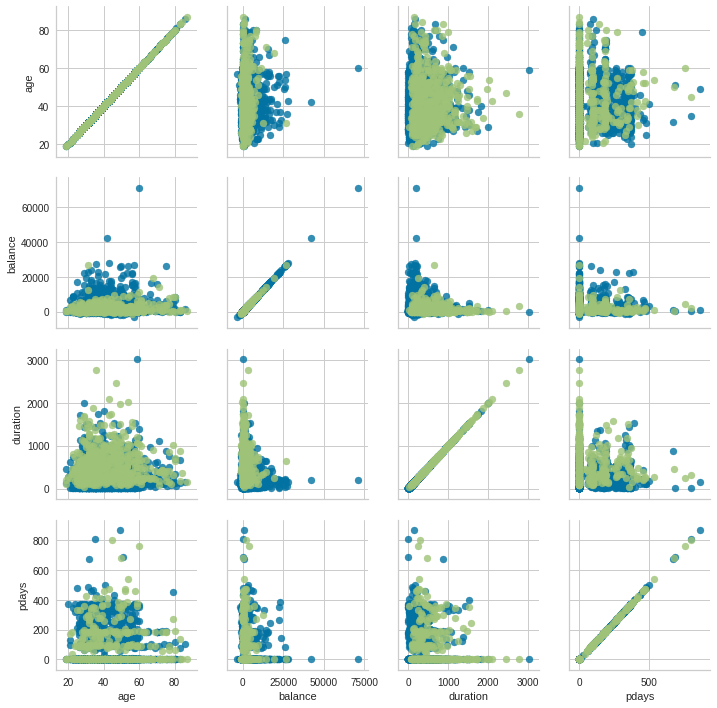

In [0]:
# First, let's see whether there is any correlation between the selected numeric variables.
g = sns.PairGrid(bank, vars=['age', 'balance', 'duration','pdays'],
                 hue='response')
g.map(plt.scatter, alpha=0.8)


age             AxesSubplot(0.125,0.71587;0.133621x0.16413)
balance      AxesSubplot(0.285345,0.71587;0.133621x0.16413)
day           AxesSubplot(0.44569,0.71587;0.133621x0.16413)
duration     AxesSubplot(0.606034,0.71587;0.133621x0.16413)
campaign     AxesSubplot(0.766379,0.71587;0.133621x0.16413)
pdays          AxesSubplot(0.125,0.518913;0.133621x0.16413)
previous    AxesSubplot(0.285345,0.518913;0.133621x0.16413)
dtype: object

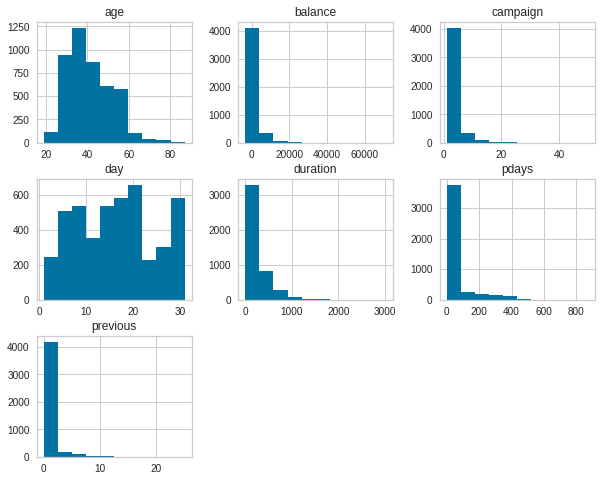

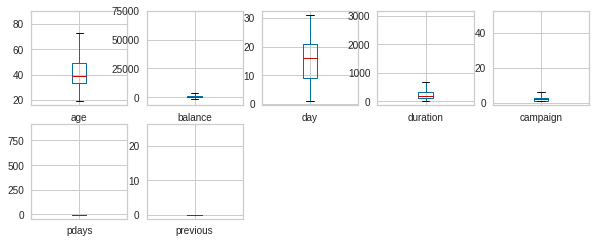

In [0]:
#///Do some more EDA///;
#Some quick plots of the data
bank.hist(figsize=(10,8))
bank.plot(kind= 'box' , subplots=True, layout=(4,5), sharex=False, sharey=False, figsize=(10,8))

In [0]:
# Examine the relationships between each demographic variable and response to the bank’s offer. 
# The demographic variables include age, job type,marital status, and level of education.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


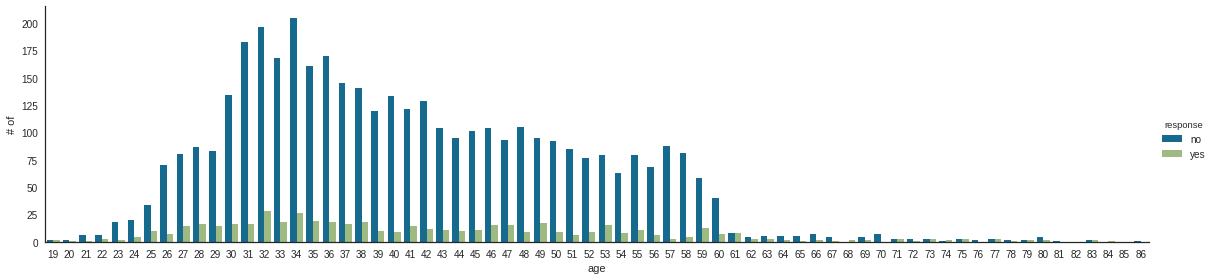

In [0]:
# Let's look at the distribution of the "target response" by age
with sns.axes_style('white'):
    g = sns.factorplot("age", data=bank, aspect=4.0, kind='count',
                       hue='response', order=range(19, 87))
    g.set_ylabels('# of')

Text(0, 0.5, 'Proportion of Target Flag')

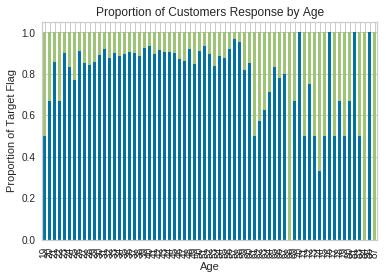

In [0]:
# Let's look at the proportion of the target flag by age
table=pd.crosstab(bank.age,bank.response)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, legend=None)
plt.title('Proportion of Customers Response by Age')
plt.xlabel('Age')
plt.ylabel('Proportion of Target Flag')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


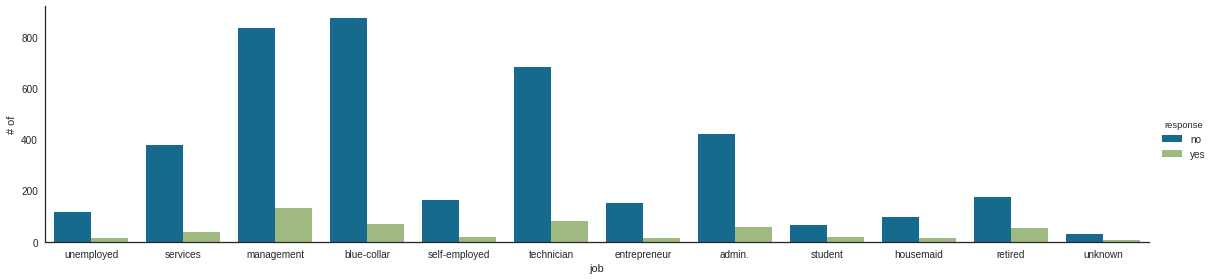

In [0]:
# Let's look at the distribution of the "target response" by job type.
with sns.axes_style('white'):
    g = sns.factorplot("job", data=bank, aspect=4.0, kind='count',
                       hue='response')
    g.set_ylabels('# of')

Text(0, 0.5, 'Proportion of Target Flag')

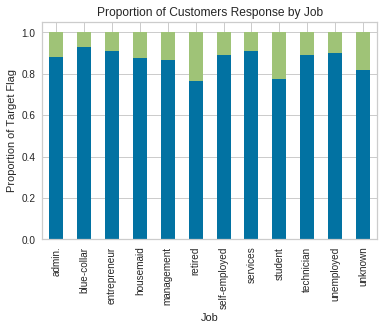

In [0]:
# Let's look at the proportion of the target flag by job type.
table=pd.crosstab(bank.job,bank.response)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, legend=None)
plt.title('Proportion of Customers Response by Job')
plt.xlabel('Job')
plt.ylabel('Proportion of Target Flag')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


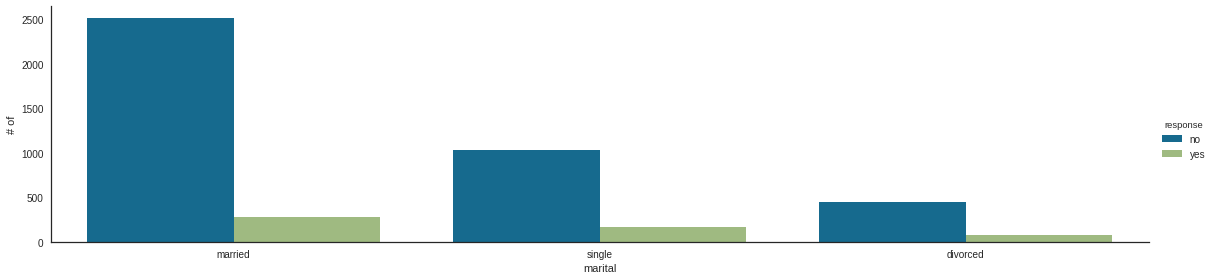

In [0]:
# Let's look at the distribution of the "target response" by marital status.
with sns.axes_style('white'):
    g = sns.factorplot("marital", data=bank, aspect=4.0, kind='count',
                       hue='response')
    g.set_ylabels('# of')

Text(0, 0.5, 'Proportion of Target Flag')

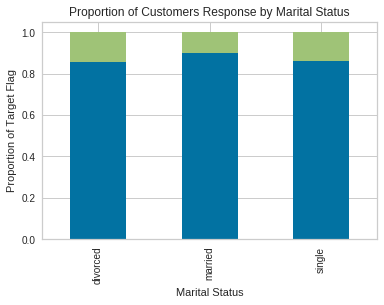

In [0]:
# Let's look at the proportion of the target flag by marital status.
table=pd.crosstab(bank.marital,bank.response)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, legend=None)
plt.title('Proportion of Customers Response by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Target Flag')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


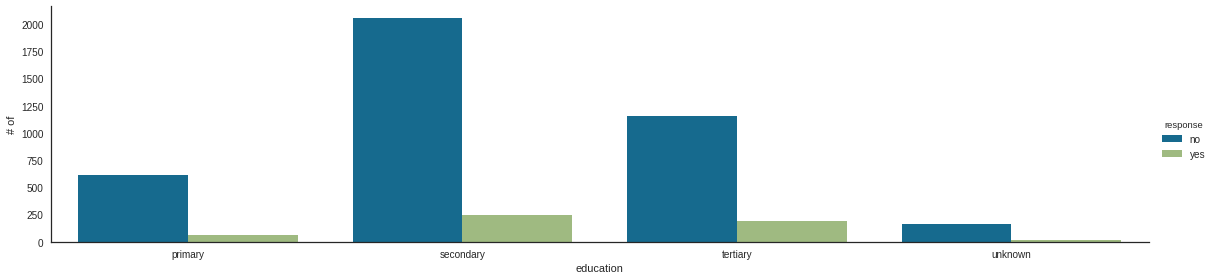

In [0]:
# Let's look at the distribution of the "target response" by education.
with sns.axes_style('white'):
    g = sns.factorplot("education", data=bank, aspect=4.0, kind='count',
                       hue='response')
    g.set_ylabels('# of')

Text(0, 0.5, 'Proportion of Target Flag')

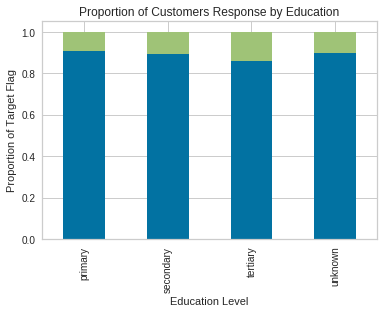

In [0]:
# Let's look at the proportion of the target flag by education level..
table=pd.crosstab(bank.education,bank.response)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, legend=None)
plt.title('Proportion of Customers Response by Education')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Target Flag')

#### Section 3: Cross Validation

Cross validation of dataset

In [0]:
# cross-validation scoring code adapted from Scikit Learn documentation
from sklearn.metrics import roc_auc_score

In [0]:
# specify the set of classifiers being evaluated
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
names = ["Naive_Bayes", "Logistic_Regression"]
classifiers = [BernoulliNB(alpha=1.0, binarize=0.5, 
                           class_prior = [0.5, 0.5], fit_prior=False), 
               LogisticRegression()]


In [0]:
# dimensions of the additive model X input and y response
print('\nData dimensions:', model_data.shape)


Data dimensions: (4521, 4)


In [0]:
# specify the k-fold cross-validation design
from sklearn.model_selection import KFold

In [0]:
# ten-fold cross-validation employed here
N_FOLDS = 10

In [0]:
# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

In [0]:
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')


Fold index: 0 ------------------------------------------

Fold index: 0 ------------------------------------------

Fold index: 0 ------------------------------------------

Fold index: 0 ------------------------------------------

Fold index: 0 ------------------------------------------

Fold index: 0 ------------------------------------------

Fold index: 0 ------------------------------------------

Fold index: 0 ------------------------------------------

Fold index: 0 ------------------------------------------

Fold index: 0 ------------------------------------------


#### Section 3: Modeling

THIS IS WHERE WE BUILD MODELS....

In [0]:
#   note that 0:model_data.shape[1]-1 slices for explanatory variables
#   and model_data.shape[1]-1 is the index for the response variable    
    X_train = model_data[train_index, 0:model_data.shape[1]-1]
    X_test = model_data[test_index, 0:model_data.shape[1]-1]
    y_train = model_data[train_index, model_data.shape[1]-1]
    y_test = model_data[test_index, model_data.shape[1]-1]   
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)
    
    index_for_method = 0  # initialize
    for name, clf in zip(names, classifiers):
        print('\nClassifier evaluation for:', name)
        print('  Scikit Learn method:', clf)
        clf.fit(X_train, y_train)  # fit on the train set for this fold
        # evaluate on the test set for this fold
        y_test_predict = clf.predict_proba(X_test)
        fold_method_result = roc_auc_score(y_test, y_test_predict[:,1]) 
        print('Area under ROC curve:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1


Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.5778268860493612

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Area under ROC curve: 0.5768204095921582


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

In [0]:
print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      '\nMethod                 Area under ROC Curve', sep = '')     
print(cv_results_df.mean()) 


----------------------------------------------
Average results from 10-fold cross-validation

Method                 Area under ROC Curve
Naive_Bayes            0.057783
Logistic_Regression    0.057682
dtype: float64


In [0]:
# --------------------------------------------------------
# Select method and apply to specific test cases
# --------------------------------------------------------
my_default = np.array([1, 1, 1, 1, 0, 0, 0, 0], np.int32)
my_housing = np.array([1, 1, 0, 0, 1, 1, 0, 0], np.int32)
my_loan = np.array([1, 0, 1, 0, 1, 0, 1, 0], np.int32)

In [0]:
my_X_test = np.vstack([my_default, my_housing, my_loan]).T

In [0]:
# fit logistic regression to full data set
clf = LogisticRegression()
X_train = model_data[:, 0:model_data.shape[1]-1]
y_train = model_data[:, model_data.shape[1]-1]
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
# predict specific test cases
y_my_test_predict = clf.predict_proba(my_X_test)

In [0]:
# create DataFrame for displaying test cases and predicted probabilities
my_targeting_df = pd.DataFrame(np.hstack([my_X_test, y_my_test_predict]))
my_targeting_df.columns = ['default', 'housing', 'loan', 
                           'predict_NO', 'predict_YES']

In [0]:
print('\n\nLogistic regression model predictions for test cases:')
print(my_targeting_df)



Logistic regression model predictions for test cases:
   default  housing  loan  predict_NO  predict_YES
0      1.0      1.0   1.0    0.945729     0.054271
1      1.0      1.0   0.0    0.892349     0.107651
2      1.0      0.0   1.0    0.900786     0.099214
3      1.0      0.0   0.0    0.811988     0.188012
4      0.0      1.0   1.0    0.953277     0.046723
5      0.0      1.0   0.0    0.906588     0.093412
6      0.0      0.0   1.0    0.914016     0.085984
7      0.0      0.0   0.0    0.834890     0.165110


In [0]:
# for targeting, select group(s) with highest predictie probabiliy 
# of responding to the promotional mailers

In [0]:
# define binary variable for logistic regression visualizations
bank['default'] = bank['default'].map({'yes': 1, 'no': 0})

In [0]:
# define binary variable for logistic regression visualizations
bank['housing'] = bank['housing'].map({'yes': 1, 'no': 0})

In [0]:
# define binary variable for logistic regression visualizations
bank['loan'] = bank['loan'].map({'yes': 1, 'no': 0})

In [0]:
# define binary variable for logistic regression visualizations
bank['response'] = bank['response'].map({'yes': 1, 'no': 0})

In [0]:
bank.head()

   age          job  marital  education  default  balance  housing  loan   contact  day month  duration  campaign  \
0   30   unemployed  married    primary        0     1787        0     0  cellular   19   oct        79         1   
1   33     services  married  secondary        0     4789        1     1  cellular   11   may       220         1   
2   35   management   single   tertiary        0     1350        1     0  cellular   16   apr       185         1   
3   30   management  married   tertiary        0     1476        1     1   unknown    3   jun       199         4   
4   59  blue-collar  married  secondary        0        0        1     0   unknown    5   may       226         1   

   pdays  previous poutcome  response  
0     -1         0  unknown         0  
1    339         4  failure         0  
2    330         1  failure         0  
3     -1         0  unknown         0  
4     -1         0  unknown         0  

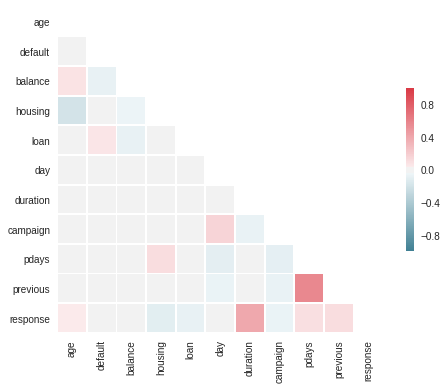

In [0]:
#Create a heatmap to check for correlated variables
# Compute the correlation matrix
corr = bank.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
        square=True, linewidths=1, xticklabels = True, yticklabels = True, cbar_kws={"shrink": .5})

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


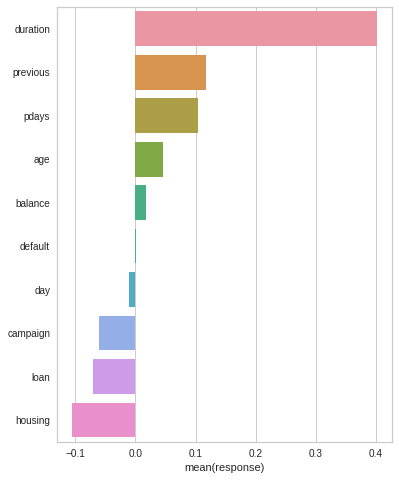

In [0]:
# Feature sorted by correlation to target wins, from positive to negative
corr = corr.sort_values('response', ascending=False)
plt.figure(figsize=(6,8))
sns.barplot( corr.response[1:], corr.index[1:], orient='h')
plt.show()

In [0]:
bank['constant'] = 1
X = bank[['default','housing','loan','constant']].copy()
y = bank[['response']].copy()

#### Section 4: Model Evaluation

In [0]:
# Install Keras with pip
!pip install statsmodels
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
#  a different look logistic regression model
logit = sm.Logit(bank['response'], bank[['default','housing','loan','duration','constant']])
result = logit.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.287778
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            No. Iterations:   7.0000   
Dependent Variable: response         Pseudo R-squared: 0.195    
Date:               2019-01-21 05:31 AIC:              2612.0908
No. Observations:   4521             BIC:              2644.1732
Df Model:           4                Log-Likelihood:   -1301.0  
Df Residuals:       4516             LL-Null:          -1615.5  
Converged:          1.0000           Scale:            1.0000   
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
default      0.2933    0.4045    0.7251  0.4684  -0.4996   1.0862
housing     -0.8653    0.1065   -8.1217  0.0000  -1.0741  -0.6564
loan        -0.9296    0.1848   -5.0315  0.0000  -1.2917  -0.5675
duration     0.0037    0.0002   20.9594  0.0000   0.0034   0.0041
constant    -2.7952    0.0932  -30.0016  0.0000  -2.9778  -2.6126
================================================================

"""

In [0]:
# sklearn model  to calculate AUC / create ROC curve
logit = linear_model.LogisticRegression()
model = logit.fit(bank[['default','housing','loan','constant']], bank['response'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# calculate the predicted probabilities
preds = model.predict_proba(bank[['default','housing','loan','constant']])[:,1]
fpr, tpr, _ = metrics.roc_curve(bank['response'], preds)

In [0]:
# calculate AUC and create ROC curve
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)

0.6086717850287908


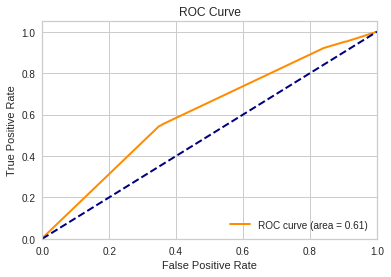

In [0]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

##### Model 2

In [0]:
X = bank[['duration','previous','pdays','default','housing','loan','constant']].copy()
y = bank[['response']].copy()

In [0]:
# Let's see if we can improve model performance by including additional variables.
logit = sm.Logit(bank['response'], bank[['duration','previous','pdays','default','housing','loan','constant']])
result = logit.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.279551
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            No. Iterations:   7.0000   
Dependent Variable: response         Pseudo R-squared: 0.218    
Date:               2019-01-21 05:31 AIC:              2541.7004
No. Observations:   4521             BIC:              2586.6159
Df Model:           6                Log-Likelihood:   -1263.9  
Df Residuals:       4514             LL-Null:          -1615.5  
Converged:          1.0000           Scale:            1.0000   
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
duration     0.0038    0.0002   20.9596  0.0000   0.0035   0.0042
previous     0.0993    0.0268    3.7083  0.0002   0.0468   0.1518
pdays        0.0026    0.0005    5.0498  0.0000   0.0016   0.0036
default      0.3831    0.4119    0.9300  0.3523  -0.4243   1.1905
housing     -0.9740    0.1096   -8.8843  0.0000  -1.1889  -0.7591
loan        -0.8925    0.1857   -4.8052  0.0000  -1.2566  -0.5285
constant    -2.9900    0.0992  -30.1255  0.0000  -3.1845  -2.7954
================================================================

"""

In [0]:
# sklearn model  to calculate AUC / create ROC curve
logit = linear_model.LogisticRegression()
model = logit.fit(bank[['duration','previous','pdays','default','housing','loan','constant']], bank['response'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# calculate the predicted probabilities
preds = model.predict_proba(bank[['duration','previous','pdays','default','housing','loan','constant']])[:,1]
fpr, tpr, _ = metrics.roc_curve(bank['response'], preds)

In [0]:
# calculate AUC and create ROC curve
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)

0.8472708733205374


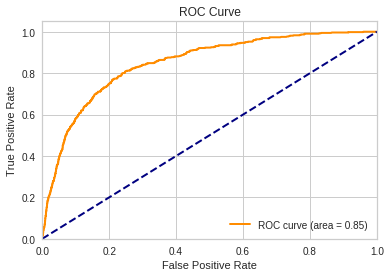

In [0]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### Conclusion

Through Naïve Bayes and Logistic Regression, we were able to identify potential customers that will invest in term deposits.

**To Summarize:**

The recommendation to bank leadership is to raise the cutoff point to .10 and to consider additional variables like duration, previous, and pdays to improve marketing campaign performance. 

*   By analyzing the distribution and proportion of the target response, we discovered that .50 may not be the best cutoff value for identifying customer response.
*   The ROC curve shows the tradeoff of various cutoffs and may be used as a decision tool by bank leaders to run a targeted marketing campaign.





